## インストール

In [1]:
!pip install chainer
!pip install cupy-cuda92

    100% |████████████████████████████████| 512kB 22.7MB/s 
  Running setup.py bdist_wheel for chainer ... - \ | / - \ done
  Stored in directory: /root/.cache/pip/wheels/96/85/2e/623d0d0f08db6eb8d75cdb89c094674c98e2304ff5d98528aa
Successfully built chainer
    100% |████████████████████████████████| 261.1MB 74kB/s 


### ChainerCVインストール

In [2]:
!pip install chainercv

    100% |████████████████████████████████| 225kB 15.9MB/s 
  Running setup.py bdist_wheel for chainercv ... - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/95/24/5a/1611db416857b5e092962bc22a70722315881e03970c7fa966
Successfully built chainercv


### import


In [0]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import chainer
 
from chainercv.datasets import voc_bbox_label_names
from chainercv.links import YOLOv2
from chainercv.links import YOLOv3
from chainercv import utils
from chainercv.visualizations import vis_bbox

## 識別したい画像ファイル


In [4]:
!ls

sample_data


In [6]:
uploaded = files.upload()

Saving 1500626459_header.jpg to 1500626459_header.jpg


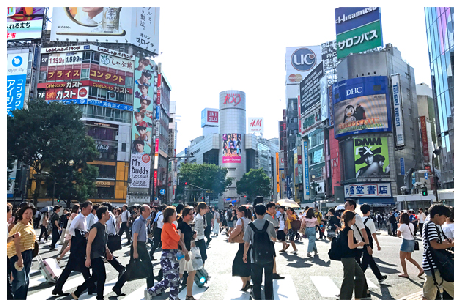

In [7]:

#画像の読み込み
im = Image.open("1500626459_header.jpg")

# 座標軸の削除処理
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')



#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

## 物体検出

From: https://chainercv-models.preferred.jp/yolo_v3_voc0712_converted_2018_05_01.npz
To: /root/.chainer/dataset/_dl_cache/79d417010adfc0e1052bb8e5c4851753
  %   Total    Recv       Speed  Time left
100  219MiB  219MiB   4427KiB/s    0:00:00

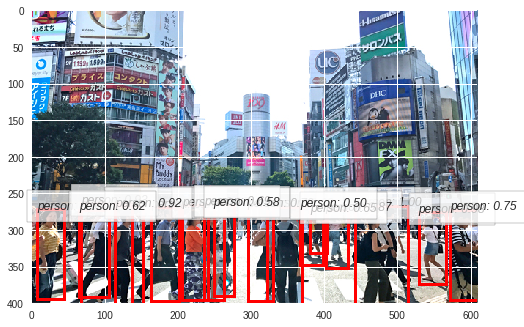

In [9]:
image = "1500626459_header.jpg"
  
'''
parser = argparse.ArgumentParser()
parser.add_argument(
    '--model', choices=('yolo_v2', 'yolo_v3'),
    default='yolo_v2')
parser.add_argument('--gpu', type=int, default=-1)
parser.add_argument('--pretrained-model', default='voc0712')
parser.add_argument('image')
args = parser.parse_args()
    
if args.model == 'yolo_v2':
    model = YOLOv2(
        n_fg_class=len(voc_bbox_label_names),
        pretrained_model=args.pretrained_model)
elif args.model == 'yolo_v3':
    model = YOLOv3(
        n_fg_class=len(voc_bbox_label_names),
        pretrained_model=args.pretrained_model)
 
if args.gpu &gt;= 0:
    chainer.cuda.get_device_from_id(args.gpu).use()
    model.to_gpu()
'''
 
model = YOLOv3(
        n_fg_class=len(voc_bbox_label_names),
        pretrained_model = 'voc0712')
    
gpu = 0 # GPU = 0, CPU = -1
chainer.cuda.get_device_from_id(gpu).use()
model.to_gpu()
    
img = utils.read_image(image, color=True)
bboxes, labels, scores = model.predict([img])
bbox, label, score = bboxes[0], labels[0], scores[0]
 
vis_bbox(
    img, bbox, label, score, label_names=voc_bbox_label_names)
    
plt.show()


#### 参考ページ
https://cpp-learning.com/colaboratory_chainer_yolo/#i

### 連続した画像から動画作成

In [0]:
import cv2

In [0]:
fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video = cv2.VideoWriter('video.mp4', fourcc, 20.0, (640, 480))

In [9]:
uploaded = files.upload()

Saving 2018_1019_2.zip to 2018_1019_2.zip


In [10]:
!unzip 2018_1019_2.zip

Archive:  2018_1019_2.zip
  inflating: 2018_1019/2018_1019 (1).png  
  inflating: 2018_1019/2018_1019 (10).png  
  inflating: 2018_1019/2018_1019 (100).png  
  inflating: 2018_1019/2018_1019 (101).png  
  inflating: 2018_1019/2018_1019 (102).png  
  inflating: 2018_1019/2018_1019 (103).png  
  inflating: 2018_1019/2018_1019 (104).png  
  inflating: 2018_1019/2018_1019 (105).png  
  inflating: 2018_1019/2018_1019 (106).png  
  inflating: 2018_1019/2018_1019 (107).png  
  inflating: 2018_1019/2018_1019 (108).png  
  inflating: 2018_1019/2018_1019 (109).png  
  inflating: 2018_1019/2018_1019 (11).png  
  inflating: 2018_1019/2018_1019 (110).png  
  inflating: 2018_1019/2018_1019 (111).png  
  inflating: 2018_1019/2018_1019 (112).png  
  inflating: 2018_1019/2018_1019 (113).png  
  inflating: 2018_1019/2018_1019 (114).png  
  inflating: 2018_1019/2018_1019 (115).png  
  inflating: 2018_1019/2018_1019 (116).png  
  inflating: 2018_1019/2018_1019 (117).png  
  inflating: 2018_1019/2018_1019 

In [11]:
!ls

2018_1019  2018_1019_2	2018_1019_2.zip  sample_data  video.mp4


In [14]:
for i in range(1, 164):
    print('2018_1019_2/2018_1019_2 ({}).png'.format(i))
    

2018_1019_2/2018_1019_2 (1).png
2018_1019_2/2018_1019_2 (2).png
2018_1019_2/2018_1019_2 (3).png
2018_1019_2/2018_1019_2 (4).png
2018_1019_2/2018_1019_2 (5).png
2018_1019_2/2018_1019_2 (6).png
2018_1019_2/2018_1019_2 (7).png
2018_1019_2/2018_1019_2 (8).png
2018_1019_2/2018_1019_2 (9).png
2018_1019_2/2018_1019_2 (10).png
2018_1019_2/2018_1019_2 (11).png
2018_1019_2/2018_1019_2 (12).png
2018_1019_2/2018_1019_2 (13).png
2018_1019_2/2018_1019_2 (14).png
2018_1019_2/2018_1019_2 (15).png
2018_1019_2/2018_1019_2 (16).png
2018_1019_2/2018_1019_2 (17).png
2018_1019_2/2018_1019_2 (18).png
2018_1019_2/2018_1019_2 (19).png
2018_1019_2/2018_1019_2 (20).png
2018_1019_2/2018_1019_2 (21).png
2018_1019_2/2018_1019_2 (22).png
2018_1019_2/2018_1019_2 (23).png
2018_1019_2/2018_1019_2 (24).png
2018_1019_2/2018_1019_2 (25).png
2018_1019_2/2018_1019_2 (26).png
2018_1019_2/2018_1019_2 (27).png
2018_1019_2/2018_1019_2 (28).png
2018_1019_2/2018_1019_2 (29).png
2018_1019_2/2018_1019_2 (30).png
2018_1019_2/2018_10

In [0]:
for i in range(1, 164):
    img = cv2.imread('2018_1019_2/2018_1019_2 ({}).png'.format(i))
    #print(img)
    img = cv2.resize(img,(640,480))
    video.write(img)

video.release()

In [9]:
!ls -l

total 27976
drwxr-xr-x 2 root root    12288 Oct 25 09:49 2018_1019
drwxr-xr-x 2 root root    12288 Oct 25 09:49 2018_1019_2
-rw-r--r-- 1 root root 24919184 Oct 25 09:48 2018_1019_2.zip
-rw-r--r-- 1 root root     2580 Oct 25 09:56 adc.json
drwxr-xr-x 2 root root     4096 Oct 23 16:44 sample_data
-rw-r--r-- 1 root root       15 Oct 25 09:57 upload_file_1.txt
-rw-r--r-- 1 root root  3683819 Oct 25 10:07 video.mp4


In [0]:
#動画ファイルを読み込む
file_name = u"video.mp4"
video = cv2.VideoCapture(file_name)
#フレーム数を取得
frame_count = int(video.get(7))
#フレームレート(1フレームの時間単位はミリ秒)の取得
frame_rate = int(video.get(5))
#ウィンドウの名前を設定
cv2.namedWindow('player',  cv2.WINDOW_AUTOSIZE)
for i in range(frame_count):
    is_read, frame = video.read()
    #フレームレートのミリ秒数待つ
    k = cv2.waitKey(frame_rate)
    if k == 27 or not is_read:
        break
    cv2.imshow("player", frame)

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
with open("video.mp4", "w") as f:
  f.write("output string 1")

upload_file_2 = drive.CreateFile()
upload_file_2.SetContentFile("video.mp4")
upload_file_2.Upload()